# Weather final report

This analysis was performed to extract insights about weather data based on latitude. Random data from a 500+ random city set was extracted from the OpenWeather web API performing successive API requests. For every city, the data sets collected included maximum temperature (in °F), wind speed (in mph), humidity (as %) and cloudiness (as %) and were categorized into two regions (Southern and Northern hemisphere). Out of this analysis, the following insights were made:
- Except for the Max Temperature data series, none of the data show significant correlation to the latitude. In the case of maximum temperature, this series shows a strong correlation in the Northern hemisphere (R = - 0.92) and a weaker one in the Southern hemisphere (R = 0.63). In general, the maximum values of this series are found near the Equator (as latitude approaches 0).
- The correlation found for the Max Temperature series is positive in the Northern hemisphere and negative in the Southern hemisphere. This is explained by the fact that in the Northern hemisphere, max. temperature values grow bigger as the Latitude grows smaller (i.e., as the analyzed city approaches the Equator). In contrast, max. temperature values grow smaller as the latitude becomes more negative (i.e., as the analyzed city approaches the South Pole). Further analysis should use the absolute values of the latitude series to observe trends as a function of the distance to the Equator no matter the hemisphere where the city is located.
- The random city analysis shows bias towards more cities in the Northern Hemisphere. This could be explained by the fact that, while the cities were selected using a uniform random distribution for both the x and y coordinates, the collected data depends on the availability of weather stations in each location. This might show a bigger weather station density in the Northern hemisphere, which might indicate possible data biases when analyzing global weather and climate trends. Trends obtained for the Northern hemisphere are thus thought to be more accurate.

In [9]:
# Dependencies and Setup
import requests
import json
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from math import floor

# Import API key
from resources import apikey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (csv)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform (low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform (low = -90.000, high = 90.000, size = 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
        
## Print the city count to confirm sufficient count
len(cities)

626

# Data Retrieval

In [12]:
# Create initial lists for DataFrame
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []

# Retrieve data from WeatherMap api for every city.

url = "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval \n-----------------------------")

for city in cities:
    
    data_set = 1 + floor(cities.index(city) / 50)
    params = {"appid": apikey,
             "q": city,
             "units": "imperial"}
    
    request = requests.get(url, params = params)
    data = request.json()
    
    try:
        print(f"Processing Record {cities.index(city) % 50} of Set {data_set} | {city}")
                        
        city_list.append(data["name"])
        cloud_list.append(data["clouds"]["all"])
        country_list.append(data["sys"]["country"])
        date_list.append(data["dt"])
        humidity_list.append(data["main"]["humidity"])
        lat_list.append(data["coord"]["lat"])
        lng_list.append(data["coord"]["lon"])
        max_temp_list.append(data["main"]["temp_max"])
        wind_speed_list.append(data["wind"]["speed"])
    
    except:
        print("City not found! Skipping...")





Beginning Data Retrieval 
-----------------------------
Processing Record 0 of Set 1 | tsihombe
City not found! Skipping...
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | niamey
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | vardo
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | margate
Processing Record 8 of Set 1 | livingstonia
Processing Record 9 of Set 1 | louisbourg
City not found! Skipping...
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | touros
Processing Record 13 of Set 1 | sedelnikovo
City not found! Skipping...
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | sao joao da barra
Processing Record 16 of Set 1 | batavia
Processing Record 17 of Set 1 | taolanaro
City not found! Skipping...
Processing Record 18 of Set 1 | vestmanna
Processing Record 19 of Set 1 | delmenhorst
Process

Processing Record 33 of Set 4 | bandarbeyla
Processing Record 34 of Set 4 | pokhara
Processing Record 35 of Set 4 | quatre cocos
Processing Record 36 of Set 4 | skagastrond
City not found! Skipping...
Processing Record 37 of Set 4 | esna
Processing Record 38 of Set 4 | krasnovishersk
Processing Record 39 of Set 4 | abay
Processing Record 40 of Set 4 | bambous virieux
Processing Record 41 of Set 4 | santiago
Processing Record 42 of Set 4 | geraldton
Processing Record 43 of Set 4 | caraquet
Processing Record 44 of Set 4 | dzhusaly
City not found! Skipping...
Processing Record 45 of Set 4 | bilma
Processing Record 46 of Set 4 | neyshabur
Processing Record 47 of Set 4 | proletariy
Processing Record 48 of Set 4 | igurubi
Processing Record 49 of Set 4 | olinda
Processing Record 0 of Set 5 | marsaxlokk
Processing Record 1 of Set 5 | kindu
Processing Record 2 of Set 5 | namibe
Processing Record 3 of Set 5 | snasa
Processing Record 4 of Set 5 | taoudenni
Processing Record 5 of Set 5 | avesta
Pr

Processing Record 20 of Set 8 | kulhudhuffushi
Processing Record 21 of Set 8 | bur gabo
City not found! Skipping...
Processing Record 22 of Set 8 | jaciara
Processing Record 23 of Set 8 | sisimiut
Processing Record 24 of Set 8 | oksovskiy
Processing Record 25 of Set 8 | laguna
Processing Record 26 of Set 8 | beloha
Processing Record 27 of Set 8 | salinas
Processing Record 28 of Set 8 | la union
Processing Record 29 of Set 8 | bay roberts
Processing Record 30 of Set 8 | sabya
Processing Record 31 of Set 8 | karamay
City not found! Skipping...
Processing Record 32 of Set 8 | bodden town
Processing Record 33 of Set 8 | nuuk
Processing Record 34 of Set 8 | mangrol
Processing Record 35 of Set 8 | kayes
Processing Record 36 of Set 8 | porbandar
Processing Record 37 of Set 8 | guia de isora
Processing Record 38 of Set 8 | turhal
Processing Record 39 of Set 8 | humaita
Processing Record 40 of Set 8 | bathsheba
Processing Record 41 of Set 8 | benguela
Processing Record 42 of Set 8 | aswan
Proce

Processing Record 9 of Set 12 | ariquemes
Processing Record 10 of Set 12 | burica
City not found! Skipping...
Processing Record 11 of Set 12 | plouzane
Processing Record 12 of Set 12 | sibut
Processing Record 13 of Set 12 | uklana mandi
Processing Record 14 of Set 12 | haverfordwest
Processing Record 15 of Set 12 | salym
Processing Record 16 of Set 12 | ituango
Processing Record 17 of Set 12 | senanga
Processing Record 18 of Set 12 | tashtagol
Processing Record 19 of Set 12 | sioux lookout
Processing Record 20 of Set 12 | mugur-aksy
Processing Record 21 of Set 12 | kharitonovo
Processing Record 22 of Set 12 | novoagansk
Processing Record 23 of Set 12 | aljezur
Processing Record 24 of Set 12 | troitsko-pechorsk
Processing Record 25 of Set 12 | iracoubo
Processing Record 26 of Set 12 | marcona
City not found! Skipping...
Processing Record 27 of Set 12 | zholymbet
Processing Record 28 of Set 12 | huesca
Processing Record 29 of Set 12 | hargeysa
Processing Record 30 of Set 12 | vestmannaey

# DataFrame

In [14]:
# Save DataFrame and export to csv file.
city_data_df = pd.DataFrame(
        {"City": city_list,
        "Cloudiness": cloud_list,
        "Contry": country_list,
        "Date": date_list,
        "Humidity": humidity_list,
        "Lat": lat_list,
        "Lng": lng_list,
        "Max Temp": max_temp_list,
        "Wind Speed": wind_speed_list})

city_data_df.head()

city_data_df.to_csv(output_data_file, index = False)

# Plotting data

## Latitude vs. Temperature Plot

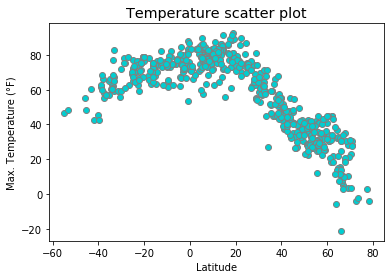

In [61]:
# Plot maximum temperatura against latitude from complete data set and save to image.
plt.scatter(lat_list, max_temp_list, c = "darkturquoise", edgecolors = "grey")
plt.title("Temperature scatter plot", size = "x-large")
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (°F)")
plt.savefig("output_images/temperature.scatter.png")
plt.show()

This plot shows a parabolic trend showing that Max. Temperature grows bigger as the analyzed city moves towards the Equator, where latitude is 0. This first hypothesis can be tested with regression analysis.

## Latitude vs. Humidity Plot

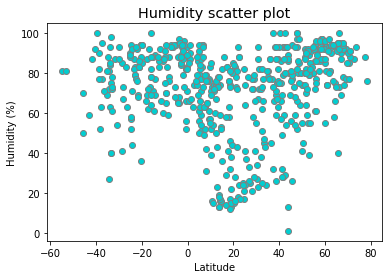

In [65]:
plt.scatter(lat_list, humidity_list, c = "darkturquoise", edgecolors = "grey")
plt.title("Humidity scatter plot", size = "x-large")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_images/humidity.scatter.png")
plt.show()

No observable trend between humidity and latitude. There is an important density between 80 and 100% humidity across all latitudes. Further analysis of this series should include variables such as altitude.

## Latitude vs. Cloudiness Plot

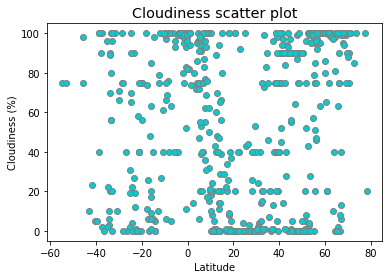

In [64]:
plt.scatter(lat_list, cloud_list, c = "darkturquoise", edgecolors = "grey")
plt.title("Cloudiness scatter plot", size = "x-large")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_images/cloudiness.scatter.png")
plt.show()

Cloudiness data show no observable trend with latitude. Horizontal patterns are observed at specific cloudiness levels in the scatter plot (near 0, 20, 40, 80 and 100). This could indicate possible biases derived from categorical cloudiness observations rather than measurements allowing continuous values.

## Latitude vs. Wind Speed Plot

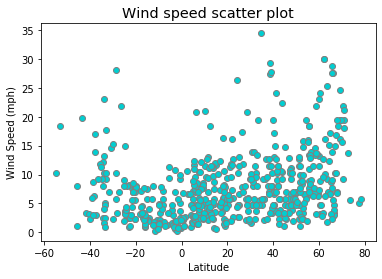

In [66]:
plt.scatter(lat_list, wind_speed_list, c = "darkturquoise", edgecolors = "grey")
plt.title("Wind speed scatter plot", size = "x-large")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("
            ")
plt.show()

Wind speed does not show observable trends with respect to latitude. Most values are concentrated below 15 mph. Factors other than latitude could explain more intense wind speeds in the outliers.

# Linear Regression

In [67]:
# Define Northern and Southern hemisphere based on latitude.
north_hem_df = city_data_df.loc[city_data_df["Lat"] > 0,:]
south_hem_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

In [122]:
#Define linear regression plot function.
def plot_linreg (x_axis, y_axis, scatter_color, line_color, x_label, y_label, title, fig_name):
    # Inputs:
        # x_axis: A list containing x regression values.
        # y_axis: A list containing y regression values.
        # scatter_color: A string defining color for the scatter plot.
        # line_color: A string defining color for the line and label.
        # x_label: A string containing x axis value.
        # y_label: A string containing y axis label.
        # title: A string with the plot title
        # fig_name: A string with the figure name to return in png format
        
    # Displays R-squared value of regression model. Plots and saves scatter plot and line regression value & equation.

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    plt.scatter(x_axis, y_axis, c = scatter_color, edgecolors = "grey")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title, size = "x-large")
    line_values = slope * x_axis + intercept
    plt.plot(x_axis, line_values, color = line_color)
    plt.text(min(x_axis), min(y_axis),f"y = {round(slope,2)}x + {round(intercept,2)} \nR-value = {round(rvalue,2)}", color = line_color, bbox = dict(facecolor = "white", alpha = 1))
    plt.savefig("output_images/" + fig_name + ".png")
    print(f"r-squared value is: {rvalue**2}")
    
    
    return plt.show()

## Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared value is: 0.8433107716500747


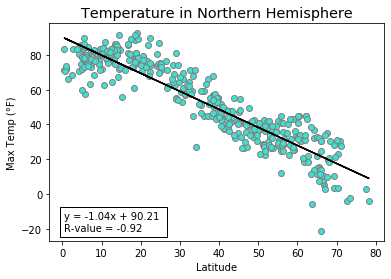

In [126]:
plot_linreg(north_hem_df["Lat"], north_hem_df["Max Temp"], "turquoise", "black", "Latitude", "Max Temp (°F)", "Temperature in Northern Hemisphere", "maxtemp_vs_latitude_north")

## Southern Hemisphere - Max Temp vs. Latitude Linear Regeression

r-squared value is: 0.3909855611219789


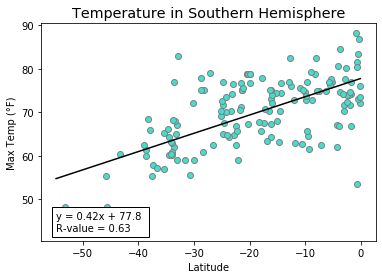

In [127]:
plot_linreg(south_hem_df["Lat"], south_hem_df["Max Temp"], "turquoise", "black", "Latitude", "Max Temp (°F)", "Temperature in Southern Hemisphere", "maxtemp_vs_latitude_south")

## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared value is: 0.14577997358905206


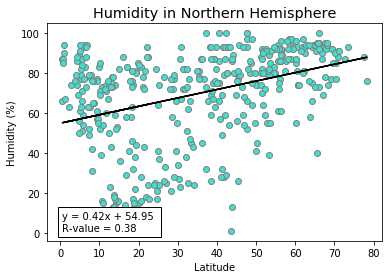

In [128]:
plot_linreg(north_hem_df["Lat"], north_hem_df["Humidity"], "turquoise", "black", "Latitude", "Humidity (%)", "Humidity in Northern Hemisphere", "humidity_vs_latitude_north")

## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared value is: 0.033107340056343935


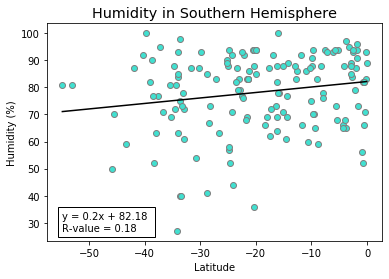

In [132]:
plot_linreg(south_hem_df["Lat"], south_hem_df["Humidity"], "turquoise", "black", "Latitude", "Humidity (%)", "Humidity in Southern Hemisphere", "humidity_vs_latitude_south")

## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared value is: 0.05611617377003674


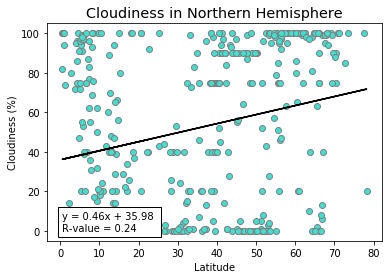

In [133]:
plot_linreg(north_hem_df["Lat"], north_hem_df["Cloudiness"], "turquoise", "black", "Latitude", "Cloudiness (%)", "Cloudiness in Northern Hemisphere", "cloudiness_vs_latitude_north")

## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared value is: 0.07870754470734333


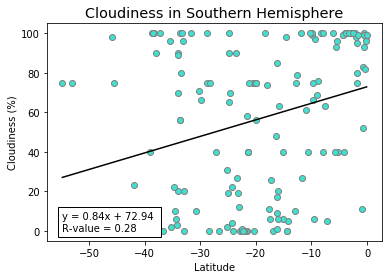

In [134]:
plot_linreg(south_hem_df["Lat"], south_hem_df["Cloudiness"], "turquoise", "black", "Latitude", "Cloudiness (%)", "Cloudiness in Southern Hemisphere", "cloudiness_vs_latitude_south")

## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared value is: 0.09759233510618734


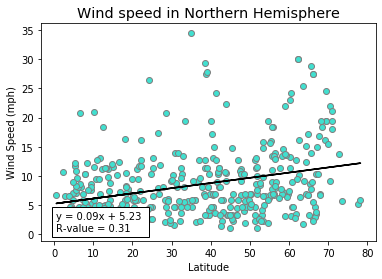

In [138]:
plot_linreg(north_hem_df["Lat"], north_hem_df["Wind Speed"], "turquoise", "black", "Latitude", "Wind Speed (mph)", "Wind speed in Northern Hemisphere", "windspeed_vs_latitude_north")

## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared value is: 0.20068860185871637


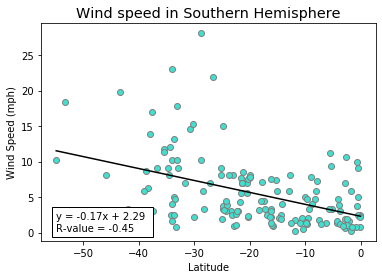

In [139]:
plot_linreg(south_hem_df["Lat"], south_hem_df["Wind Speed"], "turquoise", "black", "Latitude", "Wind Speed (mph)", "Wind speed in Southern Hemisphere", "windspeed_vs_latitude_south")